<a href="https://colab.research.google.com/github/sampadabareja/Twitter-Sentiment-Analysis/blob/master/tweetsenanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre-processing

In [1]:
!pip install matplotlib

In [0]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns 
import string



In [18]:
tweets = pd.read_csv('Covid19tweets.CSV')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
'''from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
SimpleImputer(missingval=np.nan, strate)'''

In [19]:
tweets.head(5)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,NaN,NaN,NaN,False,False,300.0,0.0,NaN,NaN,NaN,1008.0,41.0,NaN,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,NaN,NaN,NaN,False,False,1030.0,1.0,NaN,NaN,NaN,90.0,316.0,NaN,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,False,604.0,0.0,NaN,NaN,NaN,136.0,457.0,NaN,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,NaN,NaN,NaN,False,False,1827.0,0.0,NaN,NaN,NaN,1549.0,170.0,NaN,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,NaN,NaN,NaN,False,False,723.0,0.0,NaN,NaN,NaN,868.0,125.0,NaN,2016-10-19T22:05:03Z,False,es


In [5]:
tweets['text'].head()

0    Ante cualquier enfermedad respiratoria, no te ...
1    #ATENCIÓN En el Terminal Nuevo Circo se implem...
2    “People are just storing up. They are staying ...
3    Si empezaste a trabajar, necesitas dar de alta...
4    Una sociedad informada está mejor preparada an...
Name: text, dtype: object

In [0]:
#removing unnecessary special characters, numbers, punctuations in a new column called clean tweets
tweets['clean_tweets'] = tweets['text'].str.replace("[^a-zA-Z]", " ")




In [22]:
tweets['clean_tweets'].head()

0    Ante cualquier enfermedad respiratoria  no te ...
1     ATENCI N En el Terminal Nuevo Circo se implem...
2     People are just storing up  They are staying ...
3    Si empezaste a trabajar  necesitas dar de alta...
4    Una sociedad informada est  mejor preparada an...
Name: clean_tweets, dtype: object

In [23]:
tweets.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,clean_tweets
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,NaN,NaN,NaN,False,False,300.0,0.0,NaN,NaN,NaN,1008.0,41.0,NaN,2017-05-04T22:00:38Z,False,es,Ante cualquier enfermedad respiratoria no te ...
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,NaN,NaN,NaN,False,False,1030.0,1.0,NaN,NaN,NaN,90.0,316.0,NaN,2019-05-08T01:21:16Z,False,es,ATENCI N En el Terminal Nuevo Circo se implem...
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,False,604.0,0.0,NaN,NaN,NaN,136.0,457.0,NaN,2009-10-08T21:06:08Z,False,en,People are just storing up They are staying ...
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,NaN,NaN,NaN,False,False,1827.0,0.0,NaN,NaN,NaN,1549.0,170.0,NaN,2017-01-05T18:17:00Z,False,es,Si empezaste a trabajar necesitas dar de alta...
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,NaN,NaN,NaN,False,False,723.0,0.0,NaN,NaN,NaN,868.0,125.0,NaN,2016-10-19T22:05:03Z,False,es,Una sociedad informada est mejor preparada an...


In [0]:
tweets = tweets[tweets['clean_tweets'].notna()]

In [8]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.tokenize import TweetTokenizer
from tqdm import tqdm
import time 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

ar = []
start_time = time.time()
max_iter = len(tweets['clean_tweets'])
for i in (range(max_iter)):
  if i%10000 == 0:
    print("i: {}, % completed: {}%".format(i, (i/max_iter)*100))
  try:
     ar.append(tweet_tokenizer.tokenize(tweets['clean_tweets'].iloc[i]))
     
  except:
     print("error at {} ,type{}".format(i, tweets["clean_tweets"].iloc[i]))
     continue

      
 
  
   





i: 0, % completed: 0.0%
i: 10000, % completed: 22.23853047790602%
i: 20000, % completed: 44.47706095581204%
i: 30000, % completed: 66.71559143371806%
i: 40000, % completed: 88.95412191162409%


In [28]:
print(len(ar))
tweets["tokenized_tweets"] = ar

44967


In [29]:
tweets['tokenized_tweets'].head()

0    [ante, cualquier, enfermedad, respiratoria, no...
1    [atenci, n, en, el, terminal, nuevo, circo, se...
2    [people, are, just, storing, up, they, are, st...
3    [si, empezaste, a, trabajar, necesitas, dar, d...
4    [una, sociedad, informada, est, mejor, prepara...
Name: tokenized_tweets, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tweets['stemmed_tweets'] = tweets['tokenized_tweets'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming



In [31]:
tweets['stemmed_tweets'].head()

0    [ant, cualquier, enfermedad, respiratoria, no,...
1    [atenc, n, en, el, termin, nuevo, circo, se, i...
2    [peopl, are, just, store, up, they, are, stay,...
3    [si, empezast, a, trabajar, necesita, dar, de,...
4    [una, sociedad, informada, est, mejor, prepara...
Name: stemmed_tweets, dtype: object

In [32]:
for i in range(len(tweets['stemmed_tweets'])):
    tweets['stemmed_tweets'][i] = ' '.join(tweets['stemmed_tweets'][i])

tweets['clean_tweets'] = tweets['stemmed_tweets']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualisation

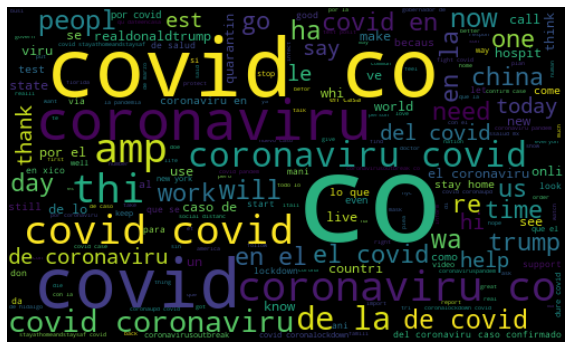

In [33]:
#making a wordcloud
all_words = ' '.join([text for text in tweets['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

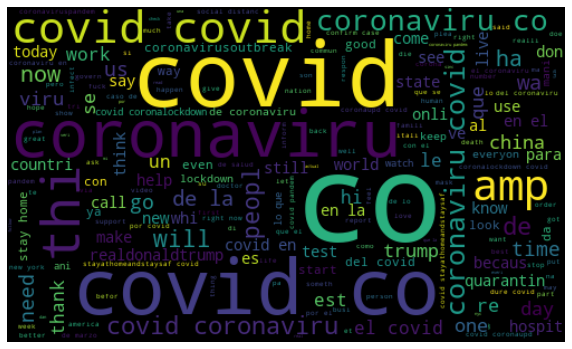

In [34]:

neutral_words =' '.join([text for text in tweets['clean_tweets'][tweets['retweet_count'] == 0]])

wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


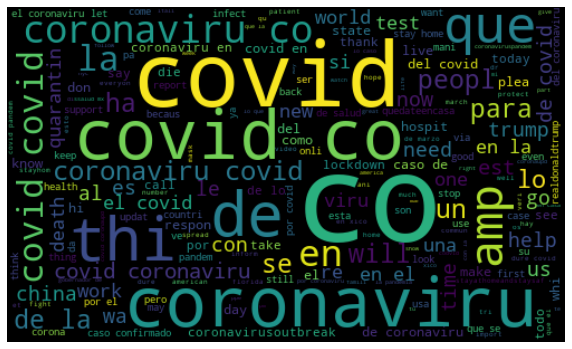

In [35]:

negative_words = ' '.join([text for text in tweets['clean_tweets'][tweets['retweet_count'] == 1]])
wordcloud = WordCloud(width=500, height=300,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Extracting feautures

In [0]:
# Bag of Words : used to create a matrix of the word corpus 
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(tweets['clean_tweets'])

In [0]:
# TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets['clean_tweets'])

Building the Model

We will build the sentiment analysis model using logistic regreesion on the basis of the above two features i.e. bag of words and TF-IDF.

1. Building model on the basis of bag of features.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:564142,:]
test_bow = bow[564142:,:]

# splitting data into training and validation set and training the model in logistic regression
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, tweets['retweet_count'], random_state=42, test_size=0.3)

logreg = LogisticRegression()
logreg.fit(xtrain_bow, ytrain) 

prediction = logreg.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score to check the precision of the model

In [0]:
# predicting the test data using the trained model
test_pred = logreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['user_id','retweet_count']]
submission.to_csv('sub_logreg_bow.csv', index=False) # writing data to a CSV file

2. Building model on the basis of TF-IDF features.

In [0]:
train_tfidf = tfidf[:564142,:]
test_tfidf = tfidf[564142:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

logreg.fit(xtrain_tfidf, ytrain)

prediction = logreg.predict_prob(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)